In [24]:
#imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load in epilepsy seizure database data
df = pd.read_csv("Epileptic Seizure Recognition.csv")

In [260]:
#get traces
traces = df.drop(columns=['y','Unnamed']).reset_index(drop=True)

#standardize traces
diff = traces.max().max() - traces.min().min()
diff2 = diff/2
ntraces = traces/diff2
sdiff = 1 - ntraces.max().max()
straces = ntraces + sdiff

#separate traces by seizure (1) and not seizure (2,3,4,5)
seiz_index = df['y'].loc[df['y'] == 1].index
norm_index = df['y'].loc[df['y'] != 1].index
seiz_traces = straces.iloc[seiz_index].reset_index(drop=True)
normal_traces = straces.iloc[norm_index].reset_index(drop=True)

#set truths
truths = [1 if i == 1 else 0 for i in df['y']]

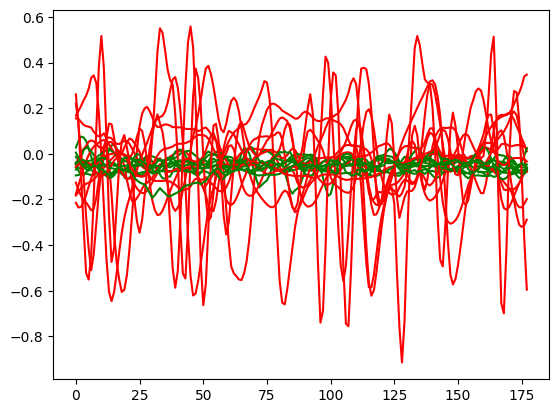

In [240]:
#plot first 10 seizure and normal traces
for i, trace in enumerate(seiz_traces):
  if i == 10:
    break
  plt.plot(range(len(seiz_traces.iloc[i])),seiz_traces.iloc[i], color='red',label = "Seizure Traces")
  plt.plot(range(len(normal_traces.iloc[i])),normal_traces.iloc[i],color='green',label = "Normal Traces")

In [261]:
#pass traces as x and label of traces (seizure or not seizure) as y
X = straces.values
y = truths

In [262]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [263]:
#create SVC model (uses RBF kernel, a function that we use for its ability to classify non-linearly)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [264]:
#make predictions on X_test
y_pred = model.predict(X_test)

In [265]:
#compare predicted against truths and compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
#convert confusion matrices to percents
percent_cm = cm/cm.sum()*100

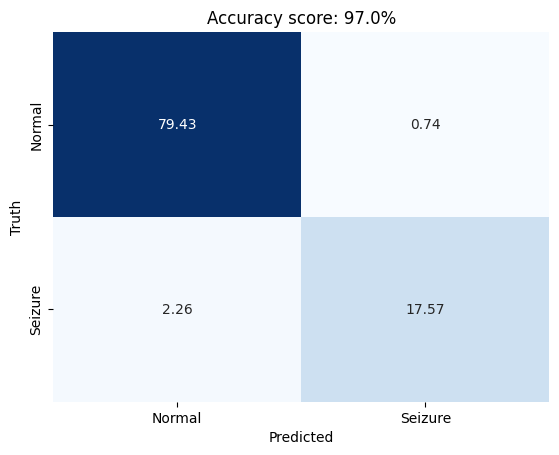

In [266]:
#show cm as a seaborn heatmap
sns.heatmap(percent_cm, annot=True, fmt="0.2f",cmap="Blues", cbar=False, xticklabels = ["Normal","Seizure"], yticklabels = ["Normal","Seizure"])
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title(f"Accuracy score: {round(accuracy_score(y_test, y_pred),4)*100}%")
plt.show()